# Displaying static images with color

This notebook explores the issues surrounding the display of images within the Jupyter notebooks using the `matplotlib` features.  It is important to be aware of the different representations of the color images and how to convert to the representation needed for rendering within notebooks.

When processing video streams we perform filtering and transformations on each frame in sequence.  A single frame is identical to a single static image.  All of the color and conversion performed here is directly applicable to processing individual video frames.

In [1]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt

---
Image source can be found on Flikr at: https://flic.kr/p/4QN48a .  This image is a tile of 9 morphs from a single photo of a painted face.  This will be good to test our face recognition filter with later.

The image from the original source appears as:

In [2]:
%%HTML
<img src="https://farm3.staticflickr.com/2062/2521247771_f8513b9fe5_o.jpg"
     width="567" height="846" alt="painted carrot morph">

Now that we know how the image is supposed to appear, lets go ahead and read the image from our local file copy.  Here we are using the OpenCV library to read a JPG image.  We also inspect the shape of the image.  We can see that it has the `x` and `y` dimensions along with a third color dimension.

The first dimension is actually the `y` dimension - it represents the rows of pixels in the image.  The second dimension is `x` representing the columns of pixels in the image.  The third dimension contains an element for each of the Red, Blue, and Green values for each pixel of the image.

In [3]:
bgr_image = cv2.imread('faces.jpg')
bgr_image.shape

(846, 567, 3)

Displaying the image below, we can see that the colors are not quite right.  This is due to the BGR image data read by OpenCV and the RGB image data expected by `matplotlib`.

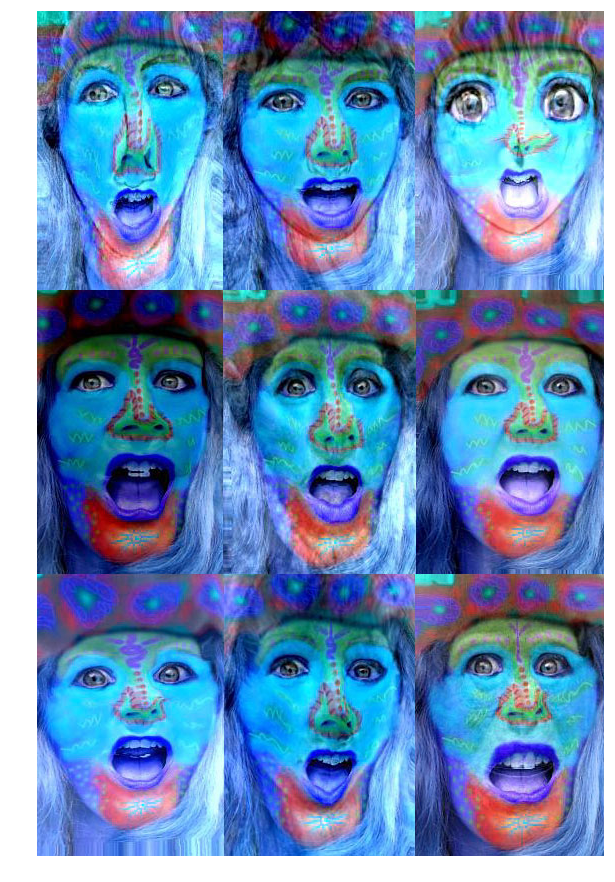

In [4]:
fig = plt.figure(figsize=(10,14),dpi=80)
ax  = fig.add_subplot(111)
ax.set_axis_off()
ax.imshow(bgr_image)

The OpenCV library holds color images in BGR format.  This means that the indices 0, 1, and 2 of the color dimension hold values for Blue, Green, and Red in that order.  This is opposite from the RGB ordering expected by the `matplotlib` rendering back ends.

We can convert from BGR to RGB either using indexing directly in Python, or by calling the OpenCV `cvtColor()` function to convert from BGR to RGB.

In [5]:
rgb_image = bgr_image[:,:,(2,1,0)]
cvt_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

We can time these two mechanisms to see which is preferable:

In [6]:
pycvt = %timeit -o bgr_image[:,:,(2,1,0)]

652 µs ± 6.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
cccvt = %timeit -o cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

85.9 µs ± 3.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
print('Python conversions are %d%% times slower than the OpenCV conversions'
     % (100*((pycvt.best/cccvt.best)-1)))

Python conversions are 689% times slower than the OpenCV conversions


The results emphasize the nature of the OpenCV library - manipulating the data within RAM without passing it to and from the Python interpreter is preferred whenever possible.  Even though the Python index manipulation is simple and intuitive, it takes 8 times as much processing latency.

At a frame rate of 24 fpS (movie speed), this simple conversion would consume 0.2% or 1.5% of the total available time for a single frame.  I think we would prefer the faster solution.  :-)

Below we render the original color ordering and the two orderings that correct the color image.  Note that the two converted images are the same, reinforcing that the processing results for the two choices are the same.

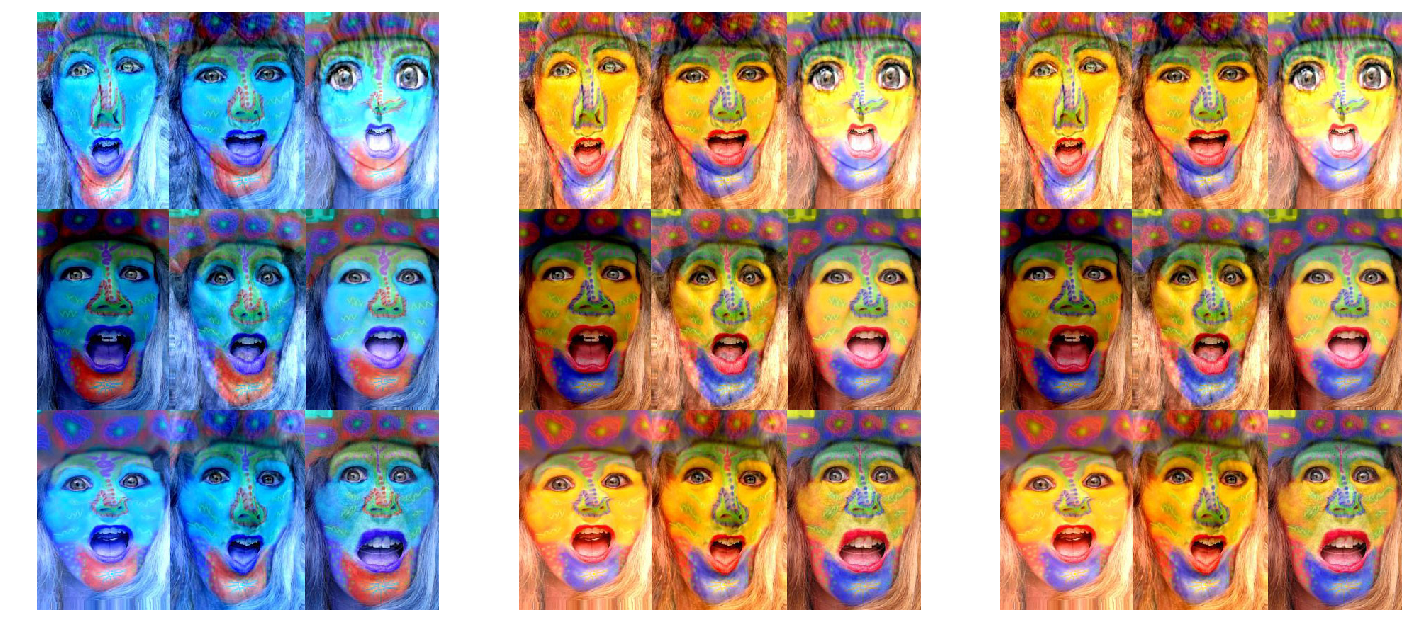

In [9]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(22.0,12.0); fig.set_dpi(80)
ax[0].set_axis_off();ax[1].set_axis_off();ax[2].set_axis_off();
ax[0].imshow(bgr_image)
ax[1].imshow(rgb_image)
ax[2].imshow(cvt_image)

Lets see what the image looks like in grayscale.  We can convert using the OpenCV library `cvtColor()` function again, this time asking for grayscale.  Looking at the converted result, we can see that the third - color - dimension is missing from the data since the image, representing grayscale luminance, only requires a single value.

Processing images using grayscale is not only a savings in storage size (RAM) and processing time (single layer to compute with), but using grayscale for feature extraction is regarded as preferable since colors are not present to add noise to the processing.

In [10]:
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_RGB2GRAY)
gray_image.shape

(846, 567)

We now display the grayscale image next to the color image for comparison.  We see that the images are the same with the only difference being the colors.  Note that all of the geometries - shapes - in the original image are still present in the grayscale image.  Some shapes are easier to see in the grayscale than they are in the color image.

Note that it is important to direct `matplotlib` to use the _'gray'_ color map (`cmap='gray'`) when showing a grayscale image.  The default grayscale uses a green color scheme.

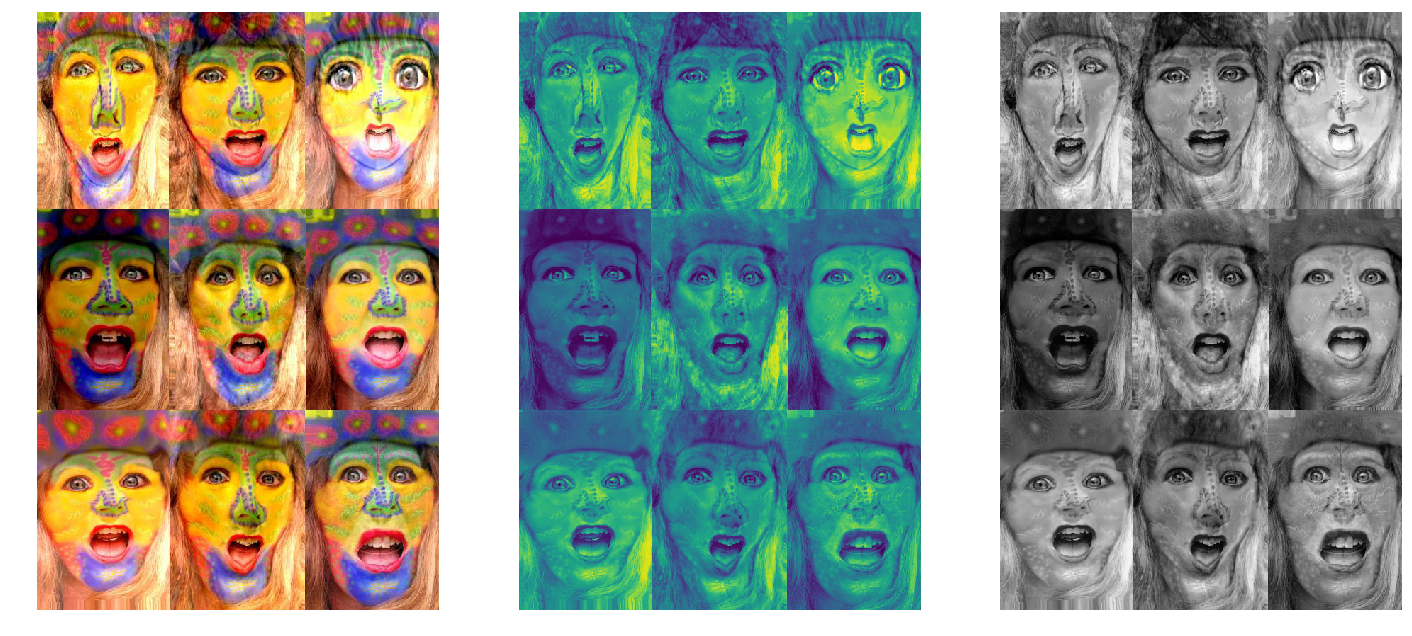

In [11]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(22.0,12.0); fig.set_dpi(80)
ax[0].set_axis_off();ax[1].set_axis_off();ax[2].set_axis_off();
ax[0].imshow(cvt_image)
ax[1].imshow(gray_image)
ax[2].imshow(gray_image,cmap='gray')

---
Just for completeness, lets end where we started, but this time render the image using our own processed version of the image.

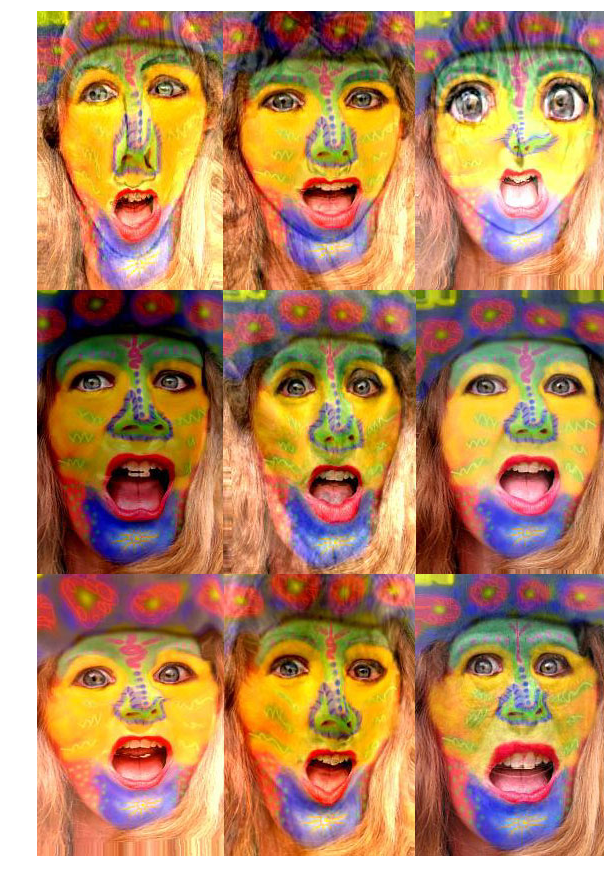

In [12]:
fig = plt.figure(figsize=(10,14),dpi=80)
ax  = fig.add_subplot(111)
ax.set_axis_off()
ax.imshow(cvt_image)